<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/2D_Gaussian_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

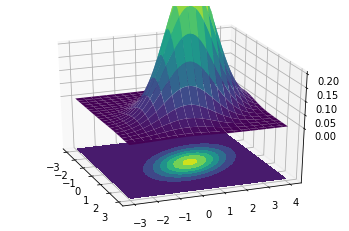

In [22]:
import numpy as np #배열 사용
from matplotlib import pyplot as plt #차트 사용 
from matplotlib import cm #cmap에사용 
from mpl_toolkits.mplot3d import Axes3D #3차원 그래픽

def multivariate_gaussian(pos,mu,Sigma):
  n=mu.shape[0] #행의 개수
  Sigma_det=np.linalg.det(Sigma) #행렬식
  Sigma_inv=np.linalg.inv(Sigma) #역행렬
  N=np.sqrt((2*np.pi)**n*Sigma_det) #가우시안 확률 분모
  fac=np.einsum('...k,kl,...l->...',pos-mu,Sigma_inv,pos-mu) #가우시안 확률 분자
  return np.exp(-fac/2)/n #가우시안 확률 분포 값

  N=60
  X=np.linspace(-3,3,N) #-3부터 3까지 N개의 1차원 배열
  Y=np.linspace(-3,4,N)  #-3부터 4까지 N개의 1차원 배열
  X,Y=np.meshgrid(X,Y) #2차원 그리드
  mu=np.array([0.,1.]) #평균 벡터
  Sigma=np.array([[1.,-0.5],[-0.5,1.5]]) #공분산 행렬
  pos=np.empty(X.shape+(2,)) #3차원 그래프로
  pos[:,:,0]=X #x축
  pos[:,:,1]=Y #y축
  Z=multivariate_gaussian(pos,mu,Sigma) #다변량 가우시안 계산
  fig=plt.figure()
  ax=fig.gca(projection='3d') #3차원축 생성성
  ax.plot_surface(X,Y,Z,rstride=3,cstride=3,linewidth=1,antialiased=True,cmap=cm.viridis) #3차원 지도, 3행 3열 컬러맵으로 
  cset=ax.contourf(X,Y,Z,zdir='z',offset=-0.2,cmap=cm.viridis) #3차원 그래프를 등고선 지도
  ax.set_zlim(-0.2,0.2) #z축 범위를 -0.2부터 0.2로 설정
  ax.set_zticks(np.linspace(0,0.2,5)) #눈금위치 조절
  ax.view_init(27,-21) #시야각을 설정
  plt.show()
